# Algeria Ai 

## Checkpoint 5 : Logistic regression 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# readding data and create dataframe
data = pd.read_csv(r"C:/Users/auros/Documents/Formations/Ai/titanic-passengers.csv",delimiter=';')
df=pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


#### Data preprocessing

In [18]:

# Handle missing values 
df['Age'].fillna(df['Age'].median(), inplace=True)
df["Cabin"].fillna( "G6",inplace=True)
df["Embarked"].fillna( "S",inplace=True)

# Convert categorical variables into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Survived'] = df['Survived'].map({'No': 0, 'Yes': 1})

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,G6,S
890,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",1,19.0,0,0,250655,26.0000,G6,S


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
# For simplicity, we'll focus on a subset of features.
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
target = 'Survived'

In [21]:
# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Apply logistic regression

In [24]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predict survival on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.75      0.71      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



2. Use a confusion matrix to validate your model.

In [27]:
from sklearn.metrics import confusion_matrix

# Assuming 'model' is the trained logistic regression model and 'X_test', 'y_test' are the test data
y_pred = model.predict(X_test)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[99 15]
 [19 46]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')


Accuracy: 0.8100558659217877
Precision: 0.7540983606557377
Recall: 0.7076923076923077
F1 Score: 0.7301587301587301


3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and 
apply them in our case

#### Courbe ROC (Receiver Operating Characteristic) : 
La courbe ROC est un graphique qui représente la performance d'un modèle de classification. Elle montre la capacité du modèle à discriminer entre les classes positives et négatives. Plus la courbe se rapproche du coin supérieur gauche, meilleure est la performance du modèle.

#### AUC (Area Under the Curve) : 
L'AUC mesure l'aire sous la courbe ROC. C'est un indicateur global de la performance du modèle. Une valeur d'AUC proche de 1 indique un modèle très performant, tandis qu'une valeur proche de 0,5 indique un modèle peu performant (équivalent au hasard).

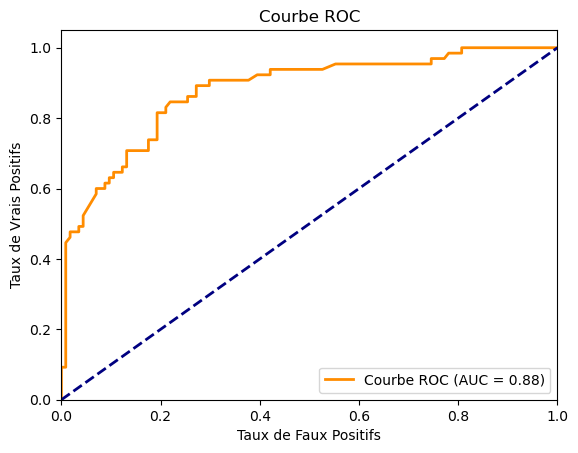

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# prédictions sur l'ensemble de test
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilités des classes positives

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()
